In [1]:
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import matplotlib.patches as patches


import numpy as np
import xarray as xr
import pandas as pd
from xgcm import Grid
import dask.array as da

from definition.forKE import *

%matplotlib inline

from dask.distributed import Client, LocalCluster
#
# Initialisation d'un cluster de 32 coeurs
cluster = LocalCluster(processes=False, n_workers=1, threads_per_worker=6)
client = Client(cluster)
client

/home/durand/miniconda3/envs/croco/lib/python3.7/site-packages/distributed/node.py:244: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 46413 instead
  http_address["port"], self.http_server.port


Client Scheduler: inproc://134.246.212.67/8287/1 Dashboard: http://134.246.212.67:46413/status,Cluster Workers: 1 Cores: 6 Memory: 33.67 GB


In [2]:
fileKE_tot='KE_tot.nc'
fileKE_bar='KE_bar.nc'

# Create different dataset for KE
ds_KEtot = xr.open_dataset(fileKE_tot, chunks={'s_rho': 1})
ds_KEbar = xr.open_dataset(fileKE_bar)

In [3]:
KE_tot=(ds_KEtot.keU_Int+ds_KEtot.keV_Int)*10000
KE_bar=(ds_KEbar.ke_Ubar+ds_KEbar.ke_Vbar)*10000

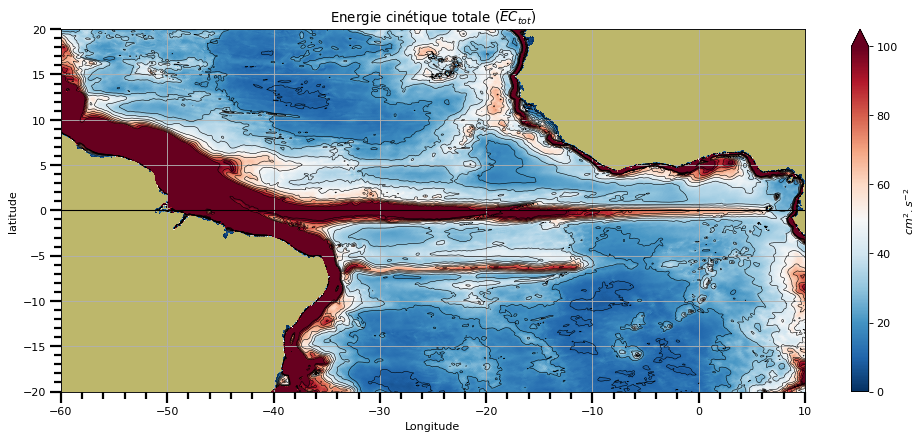

In [27]:
plt.figure(figsize=(15,6), dpi=80)

KE_tot.plot(x=[s for s in ds_KEtot.coords if "xi_" in s][0],
                       y=[s for s in ds_KEtot.coords if "eta_" in s][0],
                     vmin=0,vmax=0.010*10000,cmap='RdBu_r',cbar_kwargs={'label': '$cm^2.s^{-2}$'})

KE_tot.plot.contour(x=[s for s in ds_KEtot.coords if "xi_" in s][0],
                             y=[s for s in ds_KEtot.coords if "eta_" in s][0],
                             vmin=0,vmax=0.01*10000,levels=11,colors='black',
                             linewidths=0.5)


plt.xlim(-60,10)
plt.ylim(-20,20)
plt.xlabel('Longitude')
plt.ylabel('latitude')
plt.axhline(y=-0.,color='black',linewidth=1)
plt.title('Energie cinétique totale ($\overline{EC_{tot}}$)')
ax = plt.gca()
ax.set_facecolor('darkkhaki')

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())


ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', length=6, color='black')

plt.grid(True, which='major')  


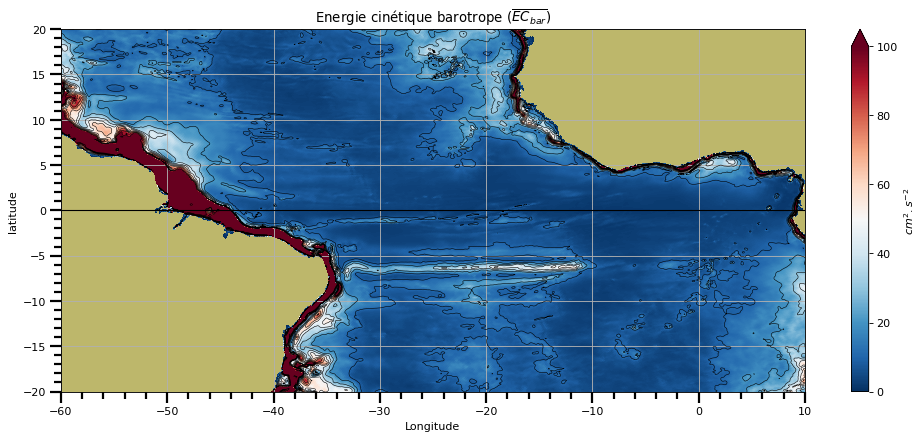

In [29]:
plt.figure(figsize=(15,6), dpi=80)

KE_bar.plot(x=[s for s in ds_KEtot.coords if "xi_" in s][0],
                       y=[s for s in ds_KEtot.coords if "eta_" in s][0],
                     vmax=0.01*10000,cmap='RdBu_r',cbar_kwargs={'label': '$cm^2.s^{-2}$'})


KE_bar.plot.contour(x=[s for s in ds_KEtot.coords if "xi_" in s][0],
                             y=[s for s in ds_KEtot.coords if "eta_" in s][0],
                             vmin=0,vmax=0.01*10000,levels=11,colors='black',
                             linewidths=0.5)

plt.xlim(-60,10)
plt.ylim(-20,20)
plt.xlabel('Longitude')
plt.ylabel('latitude')
plt.axhline(y=-0.,color='black',linewidth=1)
plt.title('Energie cinétique barotrope ($\overline{EC_{bar}}$)')
plt.grid()  
ax = plt.gca()
ax.set_facecolor('darkkhaki')

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())


ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', length=6, color='black')

In [7]:
rap_KEbar_KEtot=KE_bar/KE_tot

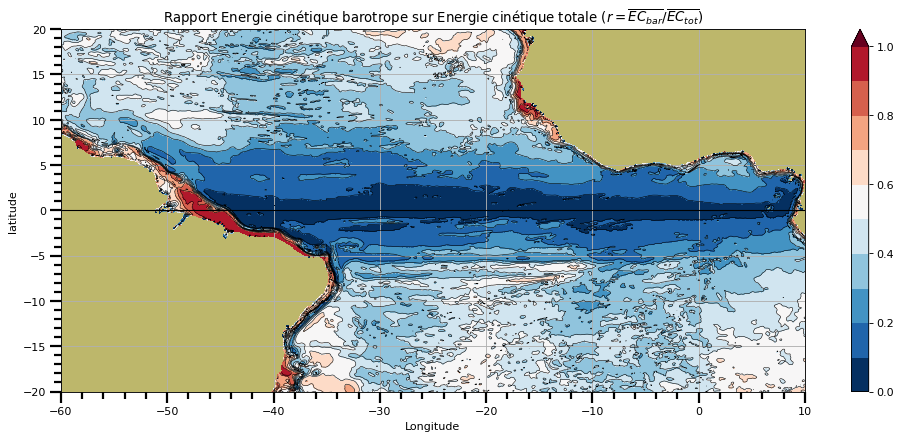

In [28]:
plt.figure(figsize=(15,6), dpi=80)

rap_KEbar_KEtot.plot(x=[s for s in ds_KEtot.coords if "xi_" in s][0],
                       y=[s for s in ds_KEtot.coords if "eta_" in s][0],
                       vmax=1,vmin=0,levels=11,cmap='RdBu_r')



rap_KEbar_KEtot.plot.contour(x=[s for s in ds_KEtot.coords if "xi_" in s][0],
                             y=[s for s in ds_KEtot.coords if "eta_" in s][0],
                             vmin=0,vmax=1,levels=11,colors='black',
                             linewidths=0.5)
plt.xlim(-60,10)
plt.ylim(-20,20)
plt.xlabel('Longitude')
plt.ylabel('latitude')
plt.axhline(y=-0.,color='black',linewidth=1)
plt.title('Rapport Energie cinétique barotrope sur Energie cinétique totale ($r=\overline{EC_{bar}}/\overline{EC_{tot}}$)')
plt.grid()

ax = plt.gca()
ax.set_facecolor('darkkhaki')

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())


ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', length=6, color='black')


In [9]:
#####----- for each component(u,v)

In [10]:
Vbar = ds_KEbar.ke_Vbar*10000
Ubar = ds_KEbar.ke_Ubar*10000

Utot = ds_KEtot.keU_Int*10000
Vtot = ds_KEtot.keV_Int*10000

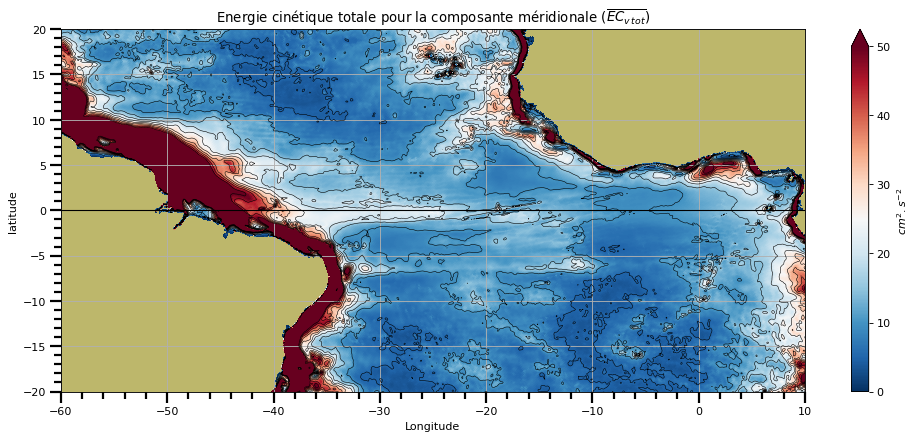

In [36]:
plt.figure(figsize=(15,6), dpi=80)

Vtot.plot(x=[s for s in ds_KEtot.coords if "xi_" in s][0],
                       y=[s for s in ds_KEtot.coords if "eta_" in s][0],
                       vmax=50,cmap='RdBu_r',cbar_kwargs={'label': '$cm^2.s^{-2}$'})



Vtot.plot.contour(x=[s for s in ds_KEtot.coords if "xi_" in s][0],
                             y=[s for s in ds_KEtot.coords if "eta_" in s][0],
                             vmin=0,vmax=50,levels=11,colors='black',
                             linewidths=0.5)

plt.xlim(-60,10)
plt.ylim(-20,20)
plt.xlabel('Longitude')
plt.ylabel('latitude')
plt.axhline(y=-0.,color='black',linewidth=1)
plt.title('Energie cinétique totale pour la composante méridionale ($\overline{EC_{v\,tot}}$)')

plt.grid()

ax = plt.gca()
ax.set_facecolor('darkkhaki')

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())


ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', length=6, color='black')

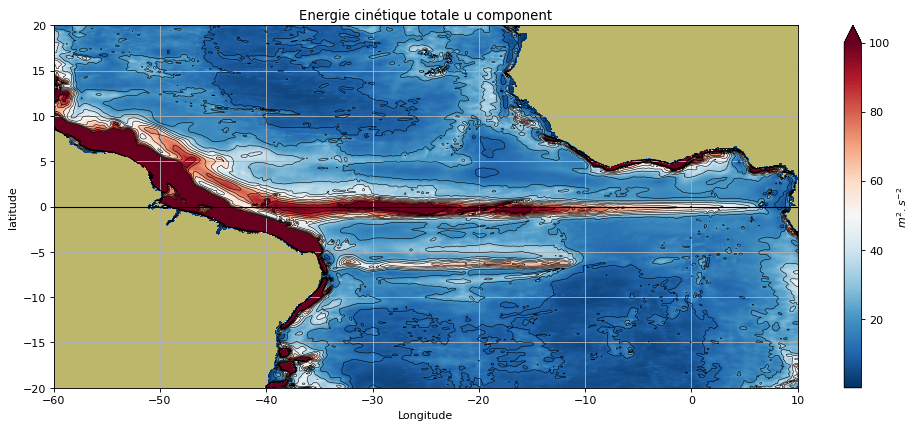

In [21]:
plt.figure(figsize=(15,6), dpi=80)

Utot.plot(x=[s for s in ds_KEtot.coords if "xi_" in s][0],
                       y=[s for s in ds_KEtot.coords if "eta_" in s][0],
                       vmax=0.010*10000,cmap='RdBu_r',cbar_kwargs={'label': '$m^2.s^{-2}$'})



Utot.plot.contour(x=[s for s in ds_KEtot.coords if "xi_" in s][0],
                             y=[s for s in ds_KEtot.coords if "eta_" in s][0],
                             vmin=0,vmax=0.01*10000,levels=11,colors='black',
                             linewidths=0.5)

plt.xlim(-60,10)
plt.ylim(-20,20)
plt.xlabel('Longitude')
plt.ylabel('latitude')
plt.axhline(y=-0.,color='black',linewidth=1)
plt.title('Energie cinétique totale u component')
plt.grid()  
ax = plt.gca()
ax.set_facecolor('darkkhaki')

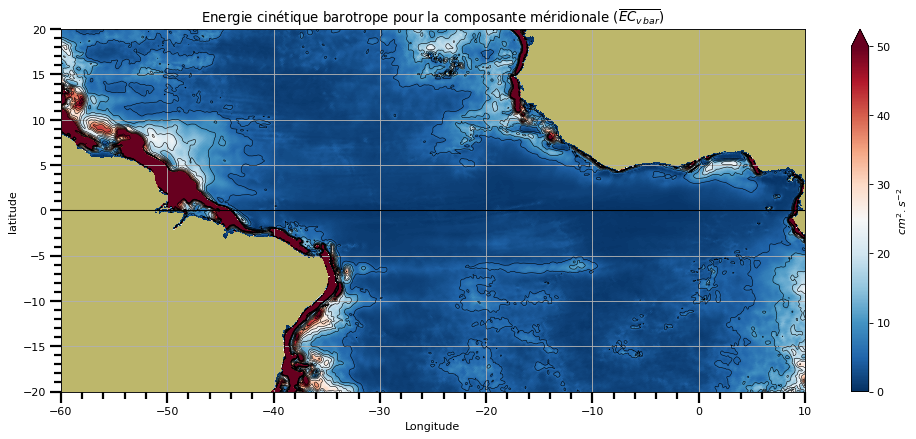

In [35]:
plt.figure(figsize=(15,6), dpi=80)

Vbar.plot(x=[s for s in ds_KEtot.coords if "xi_" in s][0],
                       y=[s for s in ds_KEtot.coords if "eta_" in s][0],
                       vmax=0.0050*10000,cmap='RdBu_r',cbar_kwargs={'label': '$cm^2.s^{-2}$'})



Vbar.plot.contour(x=[s for s in ds_KEtot.coords if "xi_" in s][0],
                             y=[s for s in ds_KEtot.coords if "eta_" in s][0],
                             vmin=0,vmax=0.005*10000,levels=11,colors='black',
                             linewidths=0.5)

plt.xlim(-60,10)
plt.ylim(-20,20)
plt.xlabel('Longitude')
plt.ylabel('latitude')
plt.axhline(y=-0.,color='black',linewidth=1)
plt.title('Energie cinétique barotrope pour la composante méridionale ($\overline{EC_{v\,bar}}$)')
plt.grid()

ax = plt.gca()
ax.set_facecolor('darkkhaki')

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())


ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', length=6, color='black')

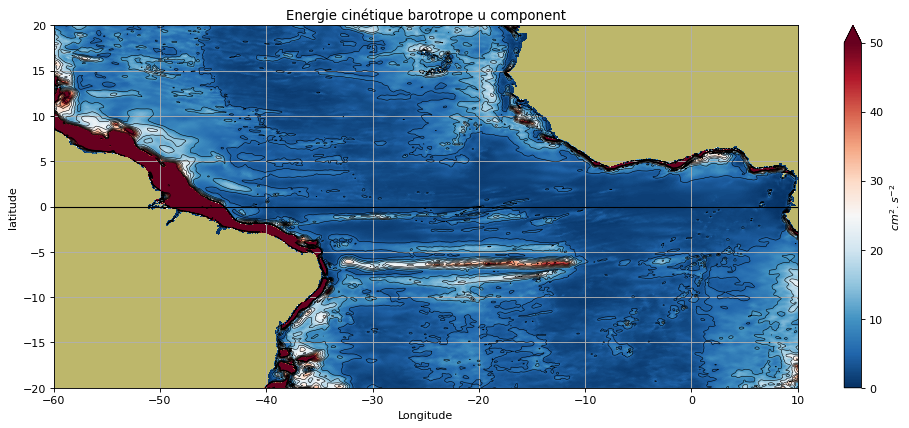

In [14]:
plt.figure(figsize=(15,6), dpi=80)

Ubar.plot(x=[s for s in ds_KEtot.coords if "xi_" in s][0],
                       y=[s for s in ds_KEtot.coords if "eta_" in s][0],
                       vmax=0.0050*10000,cmap='RdBu_r',cbar_kwargs={'label': '$cm^2.s^{-2}$'})



Ubar.plot.contour(x=[s for s in ds_KEtot.coords if "xi_" in s][0],
                             y=[s for s in ds_KEtot.coords if "eta_" in s][0],
                             vmin=0,vmax=0.005*10000,levels=11,colors='black',
                             linewidths=0.5)

plt.xlim(-60,10)
plt.ylim(-20,20)
plt.xlabel('Longitude')
plt.ylabel('latitude')
plt.axhline(y=-0.,color='black',linewidth=1)
plt.title('Energie cinétique barotrope u component')
plt.grid()  
ax = plt.gca()
ax.set_facecolor('darkkhaki')

In [15]:
###rapport
rap_Ubar_Utot=Ubar/Utot
rap_Vbar_Vtot=Vbar/Vtot

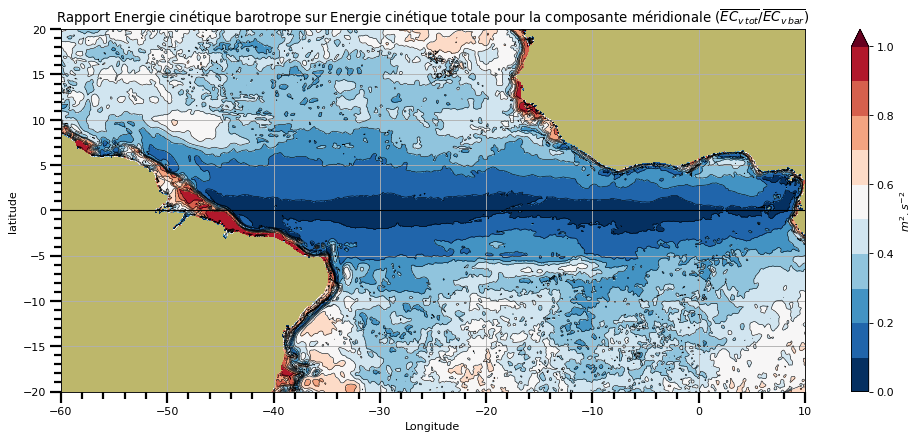

In [34]:
plt.figure(figsize=(15,6), dpi=80)

rap_Vbar_Vtot.plot(x=[s for s in ds_KEtot.coords if "xi_" in s][0],
                       y=[s for s in ds_KEtot.coords if "eta_" in s][0],
                       vmax=1,vmin=0,levels=11,cmap='RdBu_r',cbar_kwargs={'label': '$m^2.s^{-2}$'})



rap_Vbar_Vtot.plot.contour(x=[s for s in ds_KEtot.coords if "xi_" in s][0],
                             y=[s for s in ds_KEtot.coords if "eta_" in s][0],
                             vmin=0,vmax=1,levels=11,colors='black',
                             linewidths=0.5)
plt.xlim(-60,10)
plt.ylim(-20,20)
plt.xlabel('Longitude')
plt.ylabel('latitude')
plt.axhline(y=-0.,color='black',linewidth=1)
plt.title('Rapport Energie cinétique barotrope sur Energie cinétique totale pour la composante méridionale ($\overline{EC_{v\,tot}}/\overline{EC_{v\,bar}}$)')
plt.grid()

ax = plt.gca()
ax.set_facecolor('darkkhaki')

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())


ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', length=6, color='black')

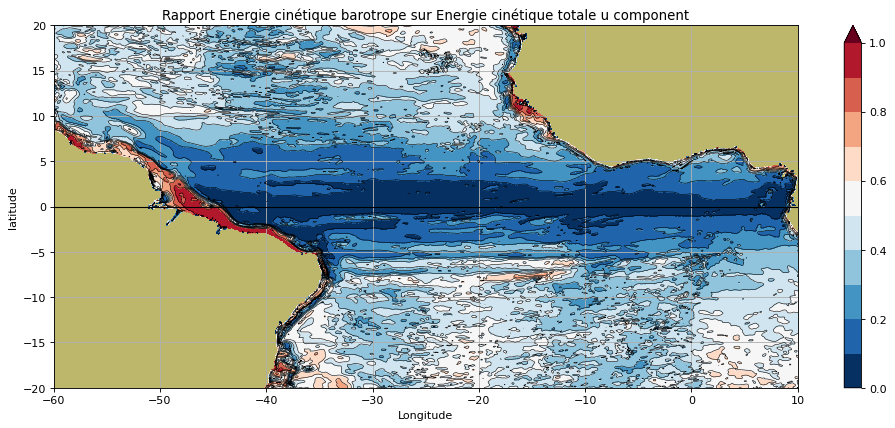

In [17]:
plt.figure(figsize=(15,6), dpi=80)

rap_Ubar_Utot.plot(x=[s for s in ds_KEtot.coords if "xi_" in s][0],
                       y=[s for s in ds_KEtot.coords if "eta_" in s][0],
                       vmax=1,vmin=0,levels=11,cmap='RdBu_r')



rap_Ubar_Utot.plot.contour(x=[s for s in ds_KEtot.coords if "xi_" in s][0],
                             y=[s for s in ds_KEtot.coords if "eta_" in s][0],
                             vmin=0,vmax=1,levels=11,colors='black',
                             linewidths=0.5)
plt.xlim(-60,10)
plt.ylim(-20,20)
plt.xlabel('Longitude')
plt.ylabel('latitude')
plt.axhline(y=-0.,color='black',linewidth=1)
plt.title('Rapport Energie cinétique barotrope sur Energie cinétique totale u component')
plt.grid()  
ax = plt.gca()
ax.set_facecolor('darkkhaki')